# Luxury Hotel Reviews in Europe
***
Zhenqi Li zhli9806@colorado.edu

Zhengwu Yuan zhyu5860@colorado.edu

Zhiren Chen zhiren.chen@colorado.edy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

## Dataset analysis

In [2]:
data = pd.read_csv('Hotel_Reviews.csv')
data.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [3]:
data.shape

(515738, 17)

In [4]:
print("Number of the data points is: ", data.shape[0],
       "\nNumber of the features is: ", data.shape[1])

Number of the data points is:  515738 
Number of the features is:  17


In [5]:
print("Number of unique hotels: ", data.Hotel_Name.nunique())

Number of unique hotels:  1492


In [6]:
for i in data.columns:
    print(i)

Hotel_Address
Additional_Number_of_Scoring
Review_Date
Average_Score
Hotel_Name
Reviewer_Nationality
Negative_Review
Review_Total_Negative_Word_Counts
Total_Number_of_Reviews
Positive_Review
Review_Total_Positive_Word_Counts
Total_Number_of_Reviews_Reviewer_Has_Given
Reviewer_Score
Tags
days_since_review
lat
lng


## Data Cleaning
### Removing the duplicates

In [7]:
print(sum(data.duplicated()))
data = data.drop_duplicates()
data.shape

526


(515212, 17)

* We find total 526 data points are duplicate and we remove them

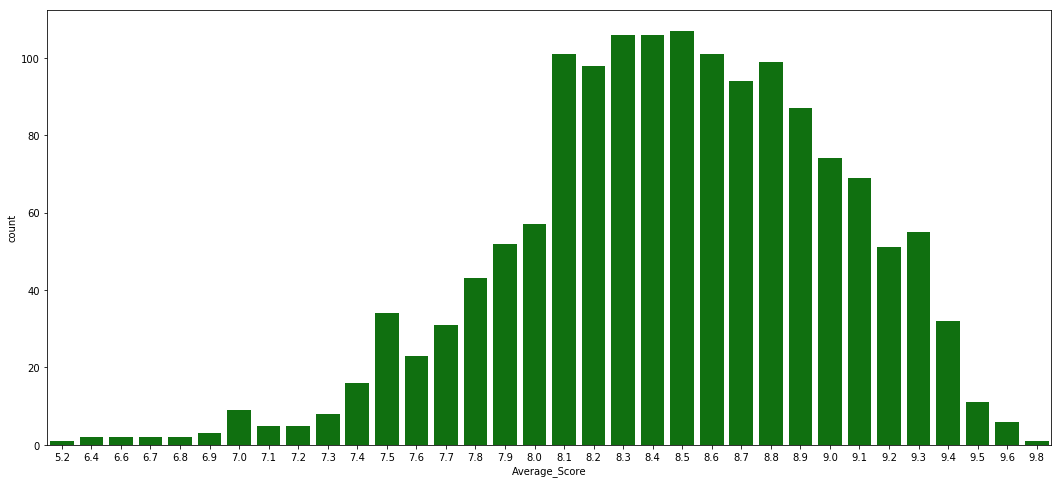

In [8]:
import seaborn as sb
plt.figure(figsize = (18,8))
data_uniq = data[["Hotel_Name","Average_Score"]].drop_duplicates()
data_uniq.head()
sb.countplot(x = "Average_Score", data =data_uniq , color = "green")

In [9]:
data_uniq["Average_Score"].describe()

count    1493.000000
mean        8.467180
std         0.548231
min         5.200000
25%         8.100000
50%         8.500000
75%         8.900000
max         9.800000
Name: Average_Score, dtype: float64

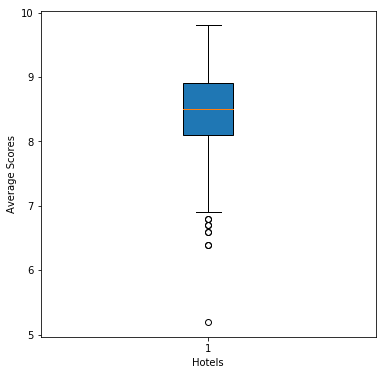

In [10]:
fig, ax = plt.subplots(figsize=(6,6))
ax.boxplot(data_uniq["Average_Score"], patch_artist = True)
ax.set_xlabel("Hotels")
ax.set_ylabel("Average Scores");

* Based on the graph, we can find that the most of reviews are in $[8.1,8.9]$
* Which means if a hotel's average score is under 8.1, then it is worse then 75% hotels in Europe.
* And this also means, if you find a hotel that have 8.9 or higher rated score, don't miss it because it is better than 75% luxury hotels. 

In [11]:
textlist = data["Reviewer_Nationality"].tolist()
d2 = [c[1:-1] for c in textlist]

In [12]:
from wordcloud import WordCloud
from collections import Counter
word_could_dict=Counter(d2)
wordcloud = WordCloud(width = 1000, height = 500, max_words = 200).generate_from_frequencies(word_could_dict)
wordcloud.recolor(random_state=312)
plt.figure( figsize=(200,100) )
plt.imshow(wordcloud)
plt.title("Wordcloud for countries ")
plt.axis("off")
plt.show()

* According to the graph, we know that the United Kingdom has the most reviewers


In [13]:
nans = lambda data: data[data.isnull().any(axis=1)]
nans_df = nans(data)
#nans_df = nans_df[['Hotel_Name','lat','lng']]
#nans_df
print('Missing values: {}'.format(len(nans_df)))


Missing values: 3268


* We want to know that how many missing values our dataset have. 
* From the above output, we found that all missing values are from 'lat' and 'lng' columns. Why? We believe that this is because our data is from Booking.com, if there is any null values in other columns, it will be filtered.

In [14]:
nans_df.Hotel_Name.describe()

count                                    3268
unique                                     17
top       Fleming s Selection Hotel Wien City
freq                                      658
Name: Hotel_Name, dtype: object

* We know there are 3268 missing values in our dataset.

In [15]:
data.Hotel_Name.describe()

count                                         515212
unique                                          1492
top       Britannia International Hotel Canary Wharf
freq                                            4789
Name: Hotel_Name, dtype: object

* We have 1492 hotels in our dataset, and the Britannia International Hotel Canary Wharf has the most reviews.

In [16]:
Hotel_Name_count = data.Hotel_Name.value_counts()
Hotel_Name_count.head()

Britannia International Hotel Canary Wharf           4789
Strand Palace Hotel                                  4256
Park Plaza Westminster Bridge London                 4169
Copthorne Tara Hotel London Kensington               3577
DoubleTree by Hilton Hotel London Tower of London    3212
Name: Hotel_Name, dtype: int64

* As the above outputs, we can obtain how many reviews each hotel has, and we can also make a plot for this:

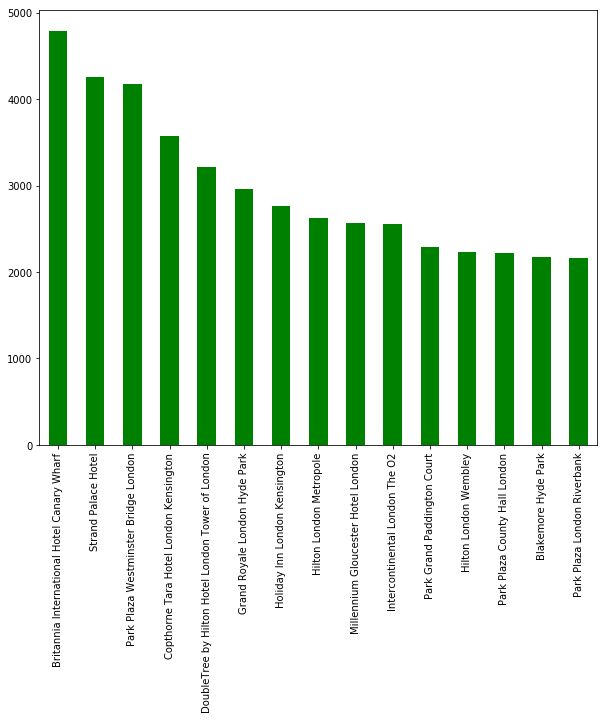

In [17]:
Hotel_Name_count[:15].plot(kind='bar',figsize=(10,8),color = 'green')

* As the plot shows, we output top 15 hotels. 

In [18]:
data.Reviewer_Nationality.describe()


count               515212
unique                 227
top        United Kingdom 
freq                245110
Name: Reviewer_Nationality, dtype: object

* We know that there are  227 different countries' users wrote reviews in our data set.
* And we konw that the users from UK contributed most of them
* And we can output this:

In [19]:
nations_count = data.Reviewer_Nationality.value_counts()
nations_count

 United Kingdom                    245110
 United States of America           35349
 Australia                          21648
 Ireland                            14814
 United Arab Emirates               10229
 Saudi Arabia                        8940
 Netherlands                         8757
 Switzerland                         8669
 Germany                             7929
 Canada                              7883
 France                              7265
 Israel                              6601
 Italy                               6113
 Belgium                             6024
 Turkey                              5440
 Kuwait                              4915
 Spain                               4735
 Romania                             4548
 Russia                              3898
 South Africa                        3816
 India                               3432
 Greece                              3400
 China                               3393
 Sweden                           

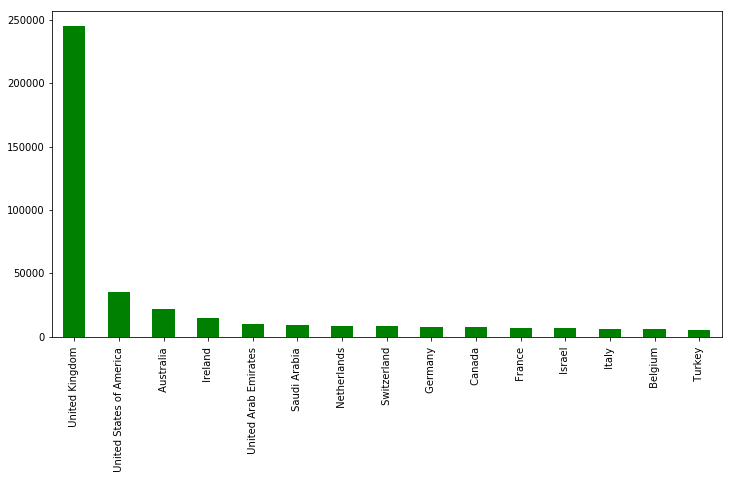

In [20]:
nations_count[:15].plot(kind='bar',figsize=(12,6),color = 'green')

In [21]:
data.Review_Date.describe()

count       515212
unique         731
top       8/2/2017
freq          2584
Name: Review_Date, dtype: object

In [22]:
data.Review_Date.value_counts().head()

8/2/2017     2584
9/15/2016    2304
4/5/2017     2284
8/30/2016    1959
2/16/2016    1939
Name: Review_Date, dtype: int64

* All reviews in our dataset are given on 731 different days. 
* Most reviews were given on 8/2/2017. 

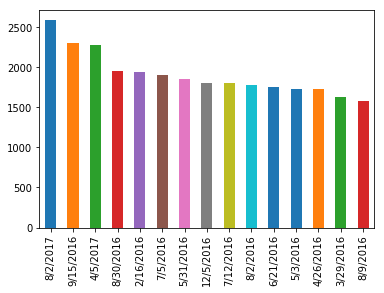

In [23]:
Review_Date_count = data.Review_Date.value_counts()
Review_Date_count[:15].plot(kind='bar')

* Top 10 reviews given days.

In [24]:
temp_df = data.drop_duplicates(['Hotel_Name'])
temp_df = temp_df.dropna(subset=['lat', 'lng'])
#Dropping missing lat and lng values in our dataset

In [25]:
import folium as folium
map_osm = folium.Map(location=[47, 6], zoom_start=5, tiles = 'Stamen Toner' )

temp_df.apply(lambda row:folium.Marker(location=[row["lat"], row["lng"]]).add_to(map_osm), axis=1)

map_osm

* The map

In [26]:
pos_words = data.Review_Total_Positive_Word_Counts.value_counts()
pos_words.head()

0    35904
6    26887
5    26809
4    24624
7    24517
Name: Review_Total_Positive_Word_Counts, dtype: int64

* There are 35904 have no positive words reviews in the data set, means those users were not satisified with the hotel they stayed at all.
* Then we save these ult-negative reviews and make some analyise:

In [27]:
a = data.loc[data.Review_Total_Positive_Word_Counts == 0]
temp_neg = a[['Hotel_Name','Positive_Review','Negative_Review']]
temp_neg.head()

,Hotel_Name,Positive_Review,Negative_Review
8,Hotel Arena,No Positive,Even though the pictures show very clean room...
32,Hotel Arena,No Positive,Our bathroom had an urine order Shower was ve...
98,Hotel Arena,No Positive,Got charged 50 for a birthday package when it...
121,Hotel Arena,No Positive,The first room had steep steps to a loft bed ...
134,Hotel Arena,No Positive,Foyer was a mess Only place to relax was the ...


In [28]:
temp_neg["Hotel_Name"].nunique()/data["Hotel_Name"].nunique()

0.9691689008042895

In [29]:
len(a)

35904

**These data have no positive review, which means that they are completely negative reviews. And we find that 96.9% of the hotels have some record with no positive reviews.**

In [30]:
b = data.loc[data.Review_Total_Negative_Word_Counts == 0 ]
temp_pos = b[['Hotel_Name', 'Positive_Review','Negative_Review']]
temp_pos.head()

,Hotel_Name,Positive_Review,Negative_Review
1,Hotel Arena,No real complaints the hotel was great great ...,No Negative
13,Hotel Arena,This hotel is being renovated with great care...,No Negative
15,Hotel Arena,This hotel is awesome I took it sincirely bec...,No Negative
18,Hotel Arena,Public areas are lovely and the room was nice...,No Negative
48,Hotel Arena,The quality of the hotel was brilliant and ev...,No Negative


In [31]:
temp_pos["Hotel_Name"].nunique()/data["Hotel_Name"].nunique()

1.0

In [32]:
(len(b)+len(a))/len(data)

0.3176575856152419

**These data have no positive review, which means that they are completely positive reviews. And we find that 100% of the hotels have some record with no positive reviews.**

# Observations:
* By review the word count of **Review_Total_Negative_Word_Counts** and **Review_Total_Positive_Word_Counts**, we can classify 163661 reviews, which is 31.77% of total reviews, thus these reviews can't be used for classifying the reviews
* i also found that with the word_count- 2 ' everything', ' Everything', ' nothing', ' Nothing' words are present in both Positive_Review and Negative_Review. ( Those words are preceded by white spaces in the begning' that's why their words count is 2
* By including ' everything', ' Everything', ' nothing', ' Nothing' words we can classify more reviews

In [33]:
data['count_pos'] = 0
data['count_neg'] = 0
data.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,count_pos,count_neg
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,0,0
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,0,0
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,0,0
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,0,0
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,0,0


In [34]:
data['Negative_Review']=[x.lower().strip() for x in data['Negative_Review']]
data['Positive_Review']=[x.lower().strip() for x in data['Positive_Review']]

**We find that the words are in mixed case letters and with whitespace, so we will clean the words**

In [35]:
data["count_neg"] = data.apply(lambda x: 1 if x["Positive_Review"] == 'no positive' or \
                           x['Positive_Review']=='nothing' or \
                           x['Negative_Review']=='everything' \
                           else x['count_pos'],axis = 1)

* When Positive_Review contains the words 'no positive' and 'nothing' are also considered as a Negtive_Review
* When the Negative_Review contains the word 'everything', will considered as Negative_Review

In [36]:
data["count_pos"] = data.apply(lambda x: 1 if x["Negative_Review"] == 'no negative' or \
                           x['Negative_Review']=='nothing' or \
                           x['Positive_Review']=='everything' \
                           else x['count_pos'],axis = 1)

* When Negative_Review contains the words 'no positive' and 'nothing' are also considered as a Positive_Review
* When the Positive_Review contains the word 'everything', will considered as Positive_Review

In [37]:
data.count_pos.value_counts()

0    365231
1    149981
Name: count_pos, dtype: int64

In [38]:
data.count_neg.value_counts()

0    477358
1     37854
Name: count_neg, dtype: int64

**We classified that how many are classified as positive and how many are negtive**

In [39]:
reviews = pd.DataFrame(data.groupby(["Hotel_Name"])["count_pos","count_neg"].sum())
reviews.head()

,count_pos,count_neg
Hotel_Name,,
11 Cadogan Gardens,55,10
1K Hotel,26,12
25hours Hotel beim MuseumsQuartier,264,30
41,57,0
45 Park Lane Dorchester Collection,19,0


In [40]:
reviews["Hotel_Name"] = reviews.index
reviews.index = range(len(reviews))
reviews.head()

,count_pos,count_neg,Hotel_Name
0,55,10,11 Cadogan Gardens
1,26,12,1K Hotel
2,264,30,25hours Hotel beim MuseumsQuartier
3,57,0,41
4,19,0,45 Park Lane Dorchester Collection


In [41]:
reviews["ratio"] = reviews["count_pos"]/(reviews["count_pos"]+reviews["count_neg"])
reviews["total"] = reviews["count_pos"]+reviews["count_neg"]

In [42]:
reviews.head()

,count_pos,count_neg,Hotel_Name,ratio,total
0,55,10,11 Cadogan Gardens,0.846154,65
1,26,12,1K Hotel,0.684211,38
2,264,30,25hours Hotel beim MuseumsQuartier,0.897959,294
3,57,0,41,1.000000,57
4,19,0,45 Park Lane Dorchester Collection,1.000000,19


In [43]:
famous_hotels = reviews.sort_values(by = "total",ascending=False).head(100)
famous_hotels.head()

,count_pos,count_neg,Hotel_Name,ratio,total
1146,1166,303,Park Plaza Westminster Bridge London,0.793737,1469
185,622,784,Britannia International Hotel Canary Wharf,0.442390,1406
1290,964,360,Strand Palace Hotel,0.728097,1324
241,843,350,Copthorne Tara Hotel London Kensington,0.706622,1193
282,944,221,DoubleTree by Hilton Hotel London Tower of London,0.810300,1165


In [44]:
pd.set_option('display.max_colwidth', 2000)
popular = famous_hotels["Hotel_Name"].values[:20]
Top_20_popular_hotels =data.loc[data['Hotel_Name'].isin(popular)][["Hotel_Name",\
                                "Hotel_Address",'Average_Score','lat','lng']].drop_duplicates()

In [45]:
Top_20_popular_hotels

,Hotel_Name,Hotel_Address,Average_Score,lat,lng
5257,Park Plaza County Hall London,1 Addington Street Lambeth London SE1 7RY United Kingdom,8.4,51.501400,-0.116009
8301,Grand Royale London Hyde Park,1 Inverness Terrace Westminster Borough London W2 3JP United Kingdom,7.7,51.510995,-0.186342
14829,Intercontinental London The O2,1 Waterview Drive Greenwich London SE10 0TW United Kingdom,9.4,51.502435,-0.000250
57597,M by Montcalm Shoreditch London Tech City,151 157 City Road Shoreditch Islington London EC1V 1JS United Kingdom,9.1,51.527847,-0.088947
63942,Britannia International Hotel Canary Wharf,163 Marsh Wall Docklands Tower Hamlets London E14 9SJ United Kingdom,7.1,51.501910,-0.023221
74223,Park Plaza London Riverbank,18 Albert Embankment Lambeth London SE1 7TJ United Kingdom,8.3,51.491374,-0.121419
111930,Hilton London Metropole,225 Edgware Road Westminster Borough London W2 1JU United Kingdom,7.5,51.519569,-0.170521
124658,DoubleTree by Hilton London Docklands Riverside,265 Rotherhithe Street Southwark London SE16 5HW United Kingdom,8.1,51.504348,-0.033444
127024,Park Grand Paddington Court,27 Devonshire Terrace Westminster Borough London W2 3DP United Kingdom,8.1,51.513556,-0.180002
140872,Blakemore Hyde Park,30 Leinster Gardens Bayswater Westminster Borough London W2 3AN United Kingdom,8.5,51.512974,-0.183743


In [46]:
maps_osm = folium.Map(location=[47, 6], zoom_start=5, tiles = 'Stamen Toner' )
Top_20_popular_hotels.apply(lambda row:folium.Marker(location=[row["lat"], row["lng"]])
                                             .add_to(maps_osm), axis=1)

maps_osm

In [47]:
pos = famous_hotels.sort_values(by = "ratio",ascending=False)["Hotel_Name"].head(20).values
famous_pos = data.loc[data['Hotel_Name'].isin(pos)][["Hotel_Name","Hotel_Address",'lat','lng','Average_Score']].drop_duplicates()
positive_map = folium.Map(location=[47, 6], zoom_start=5, tiles = 'Stamen Toner' )
famous_pos.apply(lambda row:folium.Marker(location=[row["lat"], row["lng"]])
                                             .add_to(positive_map), axis=1)

positive_map

In [48]:
famous_pos

,Hotel_Name,Hotel_Address,lat,lng,Average_Score
971,Apex Temple Court Hotel,1 2 Serjeant s Inn Fleet Street City of London London EC4Y 1LL United Kingdom,51.513734,-0.108751,9.2
44652,The Chamberlain,130 135 Minories City of London London EC3N 1NU United Kingdom,51.512246,-0.075733,8.9
85479,Hilton London Bankside,2 8 Great Suffolk Street Southwark London SE1 0UG United Kingdom,51.505696,-0.101525,9.3
96177,citizenM London Bankside,20 Lavington Street Southwark London SE1 0NZ United Kingdom,51.505151,-0.100472,9.1
100530,Mondrian London,20 Upper Ground Southwark London SE1 9PD United Kingdom,51.508404,-0.106799,9.1
147504,Shangri La Hotel at The Shard London,31 St Thomas Street Southwark London SE1 9QU United Kingdom,51.504497,-0.085556,9.4
180550,citizenM Tower of London,40 trinity square City of London London EC3N 4DJ United Kingdom,51.510237,-0.076443,9.1
223782,Club Quarters Hotel Lincoln s Inn Fields,61 Lincoln s Inn Fields Camden London WC2A 3JW United Kingdom,51.516099,-0.118175,8.9
228012,The Piccadilly London West End,65 73 Shaftesbury Avenue Westminster Borough London W1D 6EX United Kingdom,51.512196,-0.131838,9.0
273892,Urban Lodge Hotel,Arlandaweg 10 Westpoort 1043 EW Amsterdam Netherlands,52.385649,4.834443,8.6


In [49]:
data[data.Average_Score >= 8.9][['Hotel_Name','Average_Score','Total_Number_of_Reviews']].drop_duplicates().sort_values(by ='Total_Number_of_Reviews',ascending = False)[:15]

,Hotel_Name,Average_Score,Total_Number_of_Reviews
309843,Jaz Amsterdam,8.9,7108
57597,M by Montcalm Shoreditch London Tech City,9.1,4802
450210,Hotel Esther a,9.1,4687
180550,citizenM Tower of London,9.1,4672
14829,Intercontinental London The O2,9.4,4204
470003,The Square Milano Duomo,9.0,4192
483570,Hotel Berna,9.2,4017
428187,Austria Trend Hotel Savoyen Vienna,8.9,4016
464405,Hotel Stefanie,9.1,3883
96177,citizenM London Bankside,9.1,3802


In [50]:
data[['Hotel_Name','Average_Score','Total_Number_of_Reviews']].drop_duplicates().sort_values(by ='Total_Number_of_Reviews',ascending = False)[:15]

,Hotel_Name,Average_Score,Total_Number_of_Reviews
488409,Hotel Da Vinci,8.1,16670
504027,Park Plaza Westminster Bridge London,8.7,12158
496065,Hotel degli Arcimboldi,8.3,10842
164259,Strand Palace Hotel,8.1,9568
63942,Britannia International Hotel Canary Wharf,7.1,9086
311000,Best Western Premier Hotel Couture,8.7,8177
509232,The Student Hotel Amsterdam City,8.7,7656
379680,Golden Tulip Amsterdam West,8.5,7586
236055,DoubleTree by Hilton Hotel London Tower of London,8.7,7491
404728,Glam Milano,8.8,7371


In [54]:
data.Hotel_Address = data.Hotel_Address.str.replace('United Kingdom','UK')
data['State'] = data.Hotel_Address.apply(lambda x: x.split(' ')[-1])

In [55]:
data.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,count_pos,count_neg,State
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands,194,8/3/2017,7.7,Hotel Arena,Russia,i am so angry that i made this post available via all possible sites i use when planing my trips so no one will make the mistake of booking this place i made my booking via booking com we stayed for 6 nights in this hotel from 11 to 17 july upon arrival we were placed in a small room on the 2nd floor of the hotel it turned out that this was not the room we booked i had specially reserved the 2 level duplex room so that we would have a big windows and high ceilings the room itself was ok if you don t mind the broken window that can not be closed hello rain and a mini fridge that contained some sort of a bio weapon at least i guessed so by the smell of it i intimately asked to change the room and after explaining 2 times that i booked a duplex btw it costs the same as a simple double but got way more volume due to the high ceiling was offered a room but only the next day so i had to check out the next day before 11 o clock in order to get the room i waned to not the best way to begin your holiday so we had to wait till 13 00 in order to check in my new room what a wonderful waist of my time the room 023 i got was just as i wanted to peaceful internal garden view big window we were tired from waiting the room so we placed our belongings and rushed to the city in the evening it turned out that there was a constant noise in the room i guess it was made by vibrating vent tubes or something it was constant and annoying as hell and it did not stop even at 2 am making it hard to fall asleep for me and my wife i have an audio recording that i can not attach here but if you want i can send it via e mail the next day the technician came but was not able to determine the cause of the disturbing sound so i was offered to change the room once again the hotel was fully booked and they had only 1 room left the one that was smaller but seems newer,397,1403,only the park outside of the hotel was beautiful,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double Room ', ' Stayed 6 nights ']",0 days,52.360576,4.915968,0,0,Netherlands
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands,194,8/3/2017,7.7,Hotel Arena,Ireland,no negative,0,1403,no real complaints the hotel was great great location surroundings rooms amenities and service two recommendations however firstly the staff upon check in are very confusing regarding deposit payments and the staff offer you upon checkout to refund your original payment and you can make a new one bit confusing secondly the on site restaurant is a bit lacking very well thought out and excellent quality food for anyone of a vegetarian or vegan background but even a wrap or toasted sandwich option would be great aside from those minor minor things fantastic spot and will be back when i return to amsterdam,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double Room ', ' Stayed 4 nights ']",0 days,52.360576,4.915968,1,0,Netherlands
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands,194,7/31/2017,7.7,Hotel Arena,Australia,rooms are nice but for elderly a bit difficult as most rooms are two story with narrow steps so ask for single level inside the rooms are very very basic just tea coffee and boiler and no bar empty fridge,42,1403,location was good and staff were ok it is cute hotel the breakfast range is nice will go back,21,9,7.1,"[' Leisure trip ', ' Family with young children ', ' Duplex Double Room ', ' Stayed 3 nights ', ' Submitted from a mobile device ']",3 days,52.360576,4.915968,0,0,Netherlands
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands,194,7/31/2

In [53]:
data["State"].unique()

array(['Netherlands', 'UK', 'France', 'Spain', 'Italy', 'Austria'],
      dtype=object)

In [54]:
UK = pd.DataFrame(data.loc[data["State"]=='UK'])
Netherlands = pd.DataFrame(data.loc[data["State"]=='Netherlands'])
France = pd.DataFrame(data.loc[data["State"]=='France'])
Spain = pd.DataFrame(data.loc[data["State"]=='Spain'])
Italy = pd.DataFrame(data.loc[data["State"]=='Italy'])
Austria = pd.DataFrame(data.loc[data["State"]=='Austria'])

In [55]:
UKreviews = pd.DataFrame(UK.groupby(["Hotel_Name"])["count_pos","count_neg"].sum())
Nereviews = pd.DataFrame(Netherlands.groupby(["Hotel_Name"])["count_pos","count_neg"].sum())
Frreviews = pd.DataFrame(France.groupby(["Hotel_Name"])["count_pos","count_neg"].sum())
Spreviews = pd.DataFrame(Spain.groupby(["Hotel_Name"])["count_pos","count_neg"].sum())
Itreviews = pd.DataFrame(Italy.groupby(["Hotel_Name"])["count_pos","count_neg"].sum())
Aureviews = pd.DataFrame(Austria.groupby(["Hotel_Name"])["count_pos","count_neg"].sum())

In [56]:
UKreviews["Hotel_Name"] = UKreviews.index
UKreviews.index = range(len(UKreviews))

Nereviews["Hotel_Name"] = Nereviews.index
Nereviews.index = range(len(Nereviews))

Frreviews["Hotel_Name"] = Frreviews.index
Frreviews.index = range(len(Frreviews))

Spreviews["Hotel_Name"] = Spreviews.index
Spreviews.index = range(len(Spreviews))

Itreviews["Hotel_Name"] = Itreviews.index
Itreviews.index = range(len(Itreviews))

Aureviews["Hotel_Name"] = Aureviews.index
Aureviews.index = range(len(Aureviews))

UKreviews["ratio"] = UKreviews["count_pos"]/(UKreviews["count_pos"]+UKreviews["count_neg"])
UKreviews["total"] = UKreviews["count_pos"]+UKreviews["count_neg"]

Nereviews["ratio"] = Nereviews["count_pos"]/(Nereviews["count_pos"]+Nereviews["count_neg"])
Nereviews["total"] = Nereviews["count_pos"]+Nereviews["count_neg"]

Frreviews["ratio"] = Frreviews["count_pos"]/(Frreviews["count_pos"]+Frreviews["count_neg"])
Frreviews["total"] = Frreviews["count_pos"]+Frreviews["count_neg"]

Spreviews["ratio"] = Spreviews["count_pos"]/(Spreviews["count_pos"]+Spreviews["count_neg"])
Spreviews["total"] = Spreviews["count_pos"]+Spreviews["count_neg"]

Itreviews["ratio"] = Itreviews["count_pos"]/(Itreviews["count_pos"]+Itreviews["count_neg"])
Itreviews["total"] = Itreviews["count_pos"]+Itreviews["count_neg"]

Aureviews["ratio"] = Aureviews["count_pos"]/(Aureviews["count_pos"]+Aureviews["count_neg"])
Aureviews["total"] = Aureviews["count_pos"]+Aureviews["count_neg"]

In [57]:
UKreviews.head()

,count_pos,count_neg,Hotel_Name,ratio,total
0,55,10,11 Cadogan Gardens,0.846154,65
1,57,0,41,1.000000,57
2,19,0,45 Park Lane Dorchester Collection,1.000000,19
3,106,35,88 Studios,0.751773,141
4,163,25,Ace Hotel London Shoreditch,0.867021,188


In [58]:
Nereviews.head()

,count_pos,count_neg,Hotel_Name,ratio,total
0,49,10,Albus Hotel Amsterdam City Centre,0.830508,59
1,140,21,Amadi Panorama Hotel,0.869565,161
2,103,23,Amadi Park Hotel,0.817460,126
3,261,19,Ambassade Hotel,0.932143,280
4,18,3,Amsterdam Canal Residence,0.857143,21


In [59]:
Frreviews.head()

,count_pos,count_neg,Hotel_Name,ratio,total
0,26,12,1K Hotel,0.684211,38
1,61,10,9Hotel Republique,0.859155,71
2,20,1,A La Villa Madame,0.952381,21
3,25,4,AC Hotel Paris Porte Maillot by Marriott,0.862069,29
4,89,7,Acad mie H tel Saint Germain,0.927083,96


In [60]:
Spreviews.head() 

,count_pos,count_neg,Hotel_Name,ratio,total
0,10,1,ABaC Restaurant Hotel Barcelona GL Monumento,0.909091,11
1,55,38,AC Hotel Barcelona Forum a Marriott Lifestyle Hotel,0.591398,93
2,9,6,AC Hotel Diagonal L Illa a Marriott Lifestyle Hotel,0.600000,15
3,4,4,AC Hotel Irla a Marriott Lifestyle Hotel,0.500000,8
4,30,10,AC Hotel Sants a Marriott Lifestyle Hotel,0.750000,40


In [61]:
Itreviews.head() 

,count_pos,count_neg,Hotel_Name,ratio,total
0,19,8,AC Hotel Milano a Marriott Lifestyle Hotel,0.703704,27
1,42,12,ADI Doria Grand Hotel,0.777778,54
2,24,7,ADI Hotel Poliziano Fiera,0.774194,31
3,72,11,Acca Palace,0.867470,83
4,2,1,Admiral Hotel,0.666667,3


In [62]:
Aureviews.head()

,count_pos,count_neg,Hotel_Name,ratio,total
0,264,30,25hours Hotel beim MuseumsQuartier,0.897959,294
1,39,11,ARCOTEL Kaiserwasser Superior,0.780000,50
2,31,14,ARCOTEL Wimberger,0.688889,45
3,54,5,AZIMUT Hotel Vienna,0.915254,59
4,60,7,Alma Boutique Hotel,0.895522,67


In [63]:
UKfamous_hotels = UKreviews.sort_values(by = "total",ascending=False).head(100)
pd.set_option('display.max_colwidth', 2000)
UKpopular = UKfamous_hotels["Hotel_Name"].values[0:3]
UKTop_popular_hotels =data.loc[data['Hotel_Name'].isin(UKpopular)][["Hotel_Name",\
                                "Hotel_Address",'Average_Score','lat','lng']].drop_duplicates()

Nefamous_hotels = Nereviews.sort_values(by = "total",ascending=False).head(100)
pd.set_option('display.max_colwidth', 2000)
Nepopular = Nefamous_hotels["Hotel_Name"].values[:3]
NeTop_popular_hotels =data.loc[data['Hotel_Name'].isin(Nepopular)][["Hotel_Name",\
                                "Hotel_Address",'Average_Score','lat','lng']].drop_duplicates()

Frfamous_hotels = Frreviews.sort_values(by = "total",ascending=False).head(100)
pd.set_option('display.max_colwidth', 2000)
Frpopular = Frfamous_hotels["Hotel_Name"].values[:3]
FrTop_popular_hotels =data.loc[data['Hotel_Name'].isin(Frpopular)][["Hotel_Name",\
                                "Hotel_Address",'Average_Score','lat','lng']].drop_duplicates()

Spfamous_hotels = Spreviews.sort_values(by = "total",ascending=False).head(100)
pd.set_option('display.max_colwidth', 2000)
Sppopular = Spfamous_hotels["Hotel_Name"].values[:3]
SpTop_popular_hotels =data.loc[data['Hotel_Name'].isin(Sppopular)][["Hotel_Name",\
                                "Hotel_Address",'Average_Score','lat','lng']].drop_duplicates()

Itfamous_hotels = Itreviews.sort_values(by = "total",ascending=False).head(100)
pd.set_option('display.max_colwidth', 2000)
Itpopular = Itfamous_hotels["Hotel_Name"].values[:3]
ItTop_popular_hotels =data.loc[data['Hotel_Name'].isin(Itpopular)][["Hotel_Name",\
                                "Hotel_Address",'Average_Score','lat','lng']].drop_duplicates()

Aufamous_hotels = Aureviews.sort_values(by = "total",ascending=False).head(100)
pd.set_option('display.max_colwidth', 2000)
Aupopular = Aufamous_hotels["Hotel_Name"].values[:3]
AuTop_popular_hotels =data.loc[data['Hotel_Name'].isin(Aupopular)][["Hotel_Name",\
                                "Hotel_Address",'Average_Score','lat','lng']].drop_duplicates()

In [64]:
UKTop_popular_hotels

,Hotel_Name,Hotel_Address,Average_Score,lat,lng
63942,Britannia International Hotel Canary Wharf,163 Marsh Wall Docklands Tower Hamlets London E14 9SJ UK,7.1,51.501910,-0.023221
164259,Strand Palace Hotel,372 Strand Westminster Borough London WC2R 0JJ UK,8.1,51.511099,-0.120867
504027,Park Plaza Westminster Bridge London,Westminster Bridge Road Lambeth London SE1 7UT UK,8.7,51.500961,-0.116591


In [65]:
NeTop_popular_hotels

,Hotel_Name,Hotel_Address,Average_Score,lat,lng
311000,Best Western Premier Hotel Couture,Delflandlaan 15 Slotervaart 1062 EA Amsterdam Netherlands,8.7,52.351114,4.841163
450210,Hotel Esther a,Singel 303 309 Amsterdam City Center 1012 WJ Amsterdam Netherlands,9.1,52.370545,4.888644
509232,The Student Hotel Amsterdam City,Wibautstraat 129 Oost 1091 GL Amsterdam Netherlands,8.7,52.354665,4.913164


In [66]:
FrTop_popular_hotels

,Hotel_Name,Hotel_Address,Average_Score,lat,lng
76390,Pullman Paris Tour Eiffel,18 Avenue De Suffren Entr e au 22 rue Jean Rey 15th arr 75015 Paris France,8.6,48.855566,2.292624
104414,Mercure Paris Terminus Nord,21 rue de Dunkerque 10th arr 75010 Paris France,7.4,48.879484,2.355654
202331,Holiday Inn Paris Gare de l Est,5 rue du 8 Mai 1945 10th arr 75010 Paris France,7.9,48.875898,2.359050


In [67]:
SpTop_popular_hotels

,Hotel_Name,Hotel_Address,Average_Score,lat,lng
284912,Catalonia Plaza Catalunya,Bergara 11 Eixample 08002 Barcelona Spain,8.6,41.386529,2.168292
293560,Hotel Barcelona Catedral,Capellans 4 Ciutat Vella 08002 Barcelona Spain,8.9,41.384829,2.175128
381366,Eurostars Grand Marina Hotel GL,Moll de Barcelona WTC Ciutat Vella 08039 Barcelona Spain,8.5,41.371308,2.181698


In [68]:
ItTop_popular_hotels

,Hotel_Name,Hotel_Address,Average_Score,lat,lng
404728,Glam Milano,Piazza Duca D Aosta 4 6 Central Station 20124 Milan Italy,8.8,45.483850,9.203407
483570,Hotel Berna,Via Napo Torriani 18 Central Station 20124 Milan Italy,9.2,45.482669,9.203437
488409,Hotel Da Vinci,Via Senigallia 6 20161 Milan Italy,8.1,45.533137,9.171102


In [69]:
AuTop_popular_hotels

,Hotel_Name,Hotel_Address,Average_Score,lat,lng
370315,25hours Hotel beim MuseumsQuartier,Lerchenfelder Stra e 1 3 07 Neubau 1070 Vienna Austria,8.8,48.206474,16.354630
446580,Hotel de France Wien,Schottenring 3 01 Innere Stadt 1010 Vienna Austria,8.5,48.214662,16.362799
464405,Hotel Stefanie,Taborstra e 12 02 Leopoldstadt 1020 Vienna Austria,9.1,48.214277,16.380178


In [70]:
UKpos = UKfamous_hotels.sort_values(by = "ratio",ascending=False)["Hotel_Name"].head(3).values
UKfamous_pos = data.loc[data['Hotel_Name'].isin(UKpos)][["Hotel_Name","Hotel_Address",'lat','lng','Average_Score']].drop_duplicates()

Nepos = Nefamous_hotels.sort_values(by = "ratio",ascending=False)["Hotel_Name"].head(3).values
Nefamous_pos = data.loc[data['Hotel_Name'].isin(Nepos)][["Hotel_Name","Hotel_Address",'lat','lng','Average_Score']].drop_duplicates()

Frpos = Frfamous_hotels.sort_values(by = "ratio",ascending=False)["Hotel_Name"].head(3).values
Frfamous_pos = data.loc[data['Hotel_Name'].isin(Frpos)][["Hotel_Name","Hotel_Address",'lat','lng','Average_Score']].drop_duplicates()

Sppos = Spfamous_hotels.sort_values(by = "ratio",ascending=False)["Hotel_Name"].head(3).values
Spfamous_pos = data.loc[data['Hotel_Name'].isin(Sppos)][["Hotel_Name","Hotel_Address",'lat','lng','Average_Score']].drop_duplicates()

Itpos = Itfamous_hotels.sort_values(by = "ratio",ascending=False)["Hotel_Name"].head(3).values
Itfamous_pos = data.loc[data['Hotel_Name'].isin(Itpos)][["Hotel_Name","Hotel_Address",'lat','lng','Average_Score']].drop_duplicates()

Aupos = Aufamous_hotels.sort_values(by = "ratio",ascending=False)["Hotel_Name"].head(3).values
Aufamous_pos = data.loc[data['Hotel_Name'].isin(Aupos)][["Hotel_Name","Hotel_Address",'lat','lng','Average_Score']].drop_duplicates()

In [71]:
UKfamous_pos

,Hotel_Name,Hotel_Address,lat,lng,Average_Score
83097,The Hoxton Holborn,199 206 High Holborn Camden London WC1V 7BD UK,51.517240,-0.122032,9.2
223782,Club Quarters Hotel Lincoln s Inn Fields,61 Lincoln s Inn Fields Camden London WC2A 3JW UK,51.516099,-0.118175,8.9
465852,Amba Hotel Charing Cross,The Strand Westminster Borough London WC2N 5HX UK,51.508236,-0.126196,9.3


In [72]:
Nefamous_pos

,Hotel_Name,Hotel_Address,lat,lng,Average_Score
324016,Hotel V Fizeaustraat,Fizeaustraat 2 Oost 1097 SC Amsterdam Netherlands,52.345151,4.925237,9.1
348691,Hotel JL No76,Jan Luijkenstraat 76 Oud Zuid 1071 CT Amsterdam Netherlands,52.359592,4.880159,8.8
355888,Canal House,Keizersgracht 148 Amsterdam City Center 1015 CX Amsterdam Netherlands,52.376310,4.886270,9.3


In [73]:
Frfamous_pos

,Hotel_Name,Hotel_Address,lat,lng,Average_Score
105951,H tel Moli re,21 rue Moli re 1st arr 75001 Paris France,48.865529,2.336010,9.2
152204,H tel D Aubusson,33 Rue Dauphine 6th arr 75006 Paris France,48.854733,2.339528,9.4
220711,Le Relais Montmartre,6 Rue Constance 18th arr 75018 Paris France,48.885454,2.333581,9.3


In [74]:
Spfamous_pos

,Hotel_Name,Hotel_Address,lat,lng,Average_Score
316447,Hotel Casa Camper,Elisabets 11 Ciutat Vella 08001 Barcelona Spain,41.383241,2.168530,9.6
398945,Hotel The Serras,Passeig de Colom 9 Ciutat Vella 08002 Barcelona Spain,41.380181,2.180688,9.6
399732,Sixtytwo Hotel,Passeig de Gracia 62 Eixample 08007 Barcelona Spain,41.393017,2.164615,9.2


In [75]:
Itfamous_pos

,Hotel_Name,Hotel_Address,lat,lng,Average_Score
410282,The Yard Milano,Piazza XXIV Maggio 8 Milan City Center 20123 Milan Italy,45.453152,9.179172,9.2
483570,Hotel Berna,Via Napo Torriani 18 Central Station 20124 Milan Italy,45.482669,9.203437,9.2
487188,Hotel Santa Marta Suites,Via Santa Marta 4 Milan City Center 20123 Milan Italy,45.463044,9.183607,9.2


In [76]:
Aufamous_pos

,Hotel_Name,Hotel_Address,lat,lng,Average_Score
403998,Hotel Sacher Wien,Philharmoniker Stra e 4 01 Innere Stadt 1010 Vienna Austria,48.203879,16.369809,9.5
448911,Hotel Capricorno,Schwedenplatz 3 4 01 Innere Stadt 1010 Vienna Austria,48.211152,16.378863,9.1
462731,Hotel Am Stephansplatz,Stephansplatz 9 01 Innere Stadt 1010 Vienna Austria,48.208765,16.372114,9.3


In [64]:
UKre = pd.DataFrame(data.loc[data["Reviewer_Nationality"]==' United Kingdom '])
USre = pd.DataFrame(data.loc[data["Reviewer_Nationality"]==' United States of America '])

In [65]:
UKrereviews = pd.DataFrame(UKre.groupby(["Hotel_Name"])["count_pos","count_neg"].sum())
USrereviews = pd.DataFrame(USre.groupby(["Hotel_Name"])["count_pos","count_neg"].sum())

In [66]:
UKrereviews["Hotel_Name"] = UKrereviews.index
UKrereviews.index = range(len(UKrereviews))
USrereviews["Hotel_Name"] = USrereviews.index
USrereviews.index = range(len(USrereviews))

In [67]:
UKrereviews["ratio"] = UKrereviews["count_pos"]/(UKrereviews["count_pos"]+UKrereviews["count_neg"])
UKrereviews["total"] = UKrereviews["count_pos"]+UKrereviews["count_neg"]
USrereviews["ratio"] = USrereviews["count_pos"]/(USrereviews["count_pos"]+USrereviews["count_neg"])
USrereviews["total"] = USrereviews["count_pos"]+USrereviews["count_neg"]

In [68]:
UKrefamous_hotels = UKrereviews.sort_values(by = "total",ascending=False).head(100)
pd.set_option('display.max_colwidth', 2000)
UKrepopular = UKrefamous_hotels["Hotel_Name"].values[0:3]
UKreTop_popular_hotels =data.loc[data['Hotel_Name'].isin(UKrepopular)][["Hotel_Name",\
                                "Hotel_Address",'Average_Score','lat','lng']].drop_duplicates()

USrefamous_hotels = USrereviews.sort_values(by = "total",ascending=False).head(100)
pd.set_option('display.max_colwidth', 2000)
USrepopular = USrefamous_hotels["Hotel_Name"].values[0:3]
USreTop_popular_hotels =data.loc[data['Hotel_Name'].isin(USrepopular)][["Hotel_Name",\
                                "Hotel_Address",'Average_Score','lat','lng']].drop_duplicates()

In [69]:
UKreTop_popular_hotels

,Hotel_Name,Hotel_Address,Average_Score,lat,lng
14829,Intercontinental London The O2,1 Waterview Drive Greenwich London SE10 0TW UK,9.4,51.502435,-0.000250
63942,Britannia International Hotel Canary Wharf,163 Marsh Wall Docklands Tower Hamlets London E14 9SJ UK,7.1,51.501910,-0.023221
164259,Strand Palace Hotel,372 Strand Westminster Borough London WC2R 0JJ UK,8.1,51.511099,-0.120867


In [70]:
USreTop_popular_hotels

,Hotel_Name,Hotel_Address,Average_Score,lat,lng
450210,Hotel Esther a,Singel 303 309 Amsterdam City Center 1012 WJ Amsterdam Netherlands,9.1,52.370545,4.888644
483570,Hotel Berna,Via Napo Torriani 18 Central Station 20124 Milan Italy,9.2,45.482669,9.203437
504027,Park Plaza Westminster Bridge London,Westminster Bridge Road Lambeth London SE1 7UT UK,8.7,51.500961,-0.116591


In [71]:
UKrepos = UKrefamous_hotels.sort_values(by = "ratio",ascending=False)["Hotel_Name"].head(3).values
UKrefamous_pos = data.loc[data['Hotel_Name'].isin(UKrepos)][["Hotel_Name","Hotel_Address",'lat','lng','Average_Score']].drop_duplicates()

USrepos = USrefamous_hotels.sort_values(by = "ratio",ascending=False)["Hotel_Name"].head(3).values
USrefamous_pos = data.loc[data['Hotel_Name'].isin(USrepos)][["Hotel_Name","Hotel_Address",'lat','lng','Average_Score']].drop_duplicates()

In [72]:
UKrefamous_pos

,Hotel_Name,Hotel_Address,lat,lng,Average_Score
44652,The Chamberlain,130 135 Minories City of London London EC3N 1NU UK,51.512246,-0.075733,8.9
223782,Club Quarters Hotel Lincoln s Inn Fields,61 Lincoln s Inn Fields Camden London WC2A 3JW UK,51.516099,-0.118175,8.9
450210,Hotel Esther a,Singel 303 309 Amsterdam City Center 1012 WJ Amsterdam Netherlands,52.370545,4.888644,9.1


In [73]:
USrefamous_pos

,Hotel_Name,Hotel_Address,lat,lng,Average_Score
122341,H tel Da Vinci Spa,25 rue des Saints P res 6th arr 75006 Paris France,48.856578,2.331977,9.1
316447,Hotel Casa Camper,Elisabets 11 Ciutat Vella 08001 Barcelona Spain,41.383241,2.168530,9.6
464405,Hotel Stefanie,Taborstra e 12 02 Leopoldstadt 1020 Vienna Austria,48.214277,16.380178,9.1
